<a href="https://colab.research.google.com/github/x2stech-vn/google-colab/blob/main/Vintern_1B_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timm einops
!wget https://github.com/Dao-AILab/flash-attention/releases/download/v2.6.3/flash_attn-2.6.3+cu123torch2.4cxx11abiFALSE-cp310-cp310-linux_x86_64.whl
!pip install --no-dependencies --upgrade flash_attn-2.6.3+cu123torch2.4cxx11abiFALSE-cp310-cp310-linux_x86_64.whl

In [ ]:
pip install transformers==4.37.2

In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as T
# from decord import VideoReader, cpu
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    image = Image.open(image_file).convert('RGB')
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [ ]:
model_name = "5CD-AI/Vintern-1B-v2"
model_name = "5CD-AI/Vintern-1B-v3_5"

In [ ]:
try:
  model = AutoModel.from_pretrained(
      model_name,
      torch_dtype=torch.bfloat16,
      low_cpu_mem_usage=True,
      trust_remote_code=True,
      use_flash_attn=False,
  ).eval().cuda()
except:
  model = AutoModel.from_pretrained(
      model_name,
      torch_dtype=torch.bfloat16,
      low_cpu_mem_usage=True,
      trust_remote_code=True
  ).eval().cuda()

config.json:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

configuration_internvl_chat.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

configuration_intern_vit.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- configuration_internvl_chat.py
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internvl_chat.py:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

conversation.py:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_intern_vit.py:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v3_5:
- modeling_internvl_chat.py
- conversation.py
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is depreca

model.safetensors:   0%|          | 0.00/3.75G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/129 [00:00<?, ?B/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, use_fast=False)

tokenizer_config.json:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.38M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
!wget https://quynhontourist.com/wp-content/uploads/2021/03/ho-so-nang-luc-quy-nhon-tourist-quynhontourist-1.jpg

--2025-01-12 17:31:46--  https://quynhontourist.com/wp-content/uploads/2021/03/ho-so-nang-luc-quy-nhon-tourist-quynhontourist-1.jpg
Resolving quynhontourist.com (quynhontourist.com)... 103.221.223.46
Connecting to quynhontourist.com (quynhontourist.com)|103.221.223.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166523 (163K) [image/jpeg]
Saving to: ‘ho-so-nang-luc-quy-nhon-tourist-quynhontourist-1.jpg’

ho-so-nang-luc-quy- 100%[===================>] 162.62K  --.-KB/s    in 0.1s    

2025-01-12 17:31:46 (1.37 MB/s) - ‘ho-so-nang-luc-quy-nhon-tourist-quynhontourist-1.jpg’ saved [166523/166523]



In [ ]:
import matplotlib.pyplot as plt
import glob

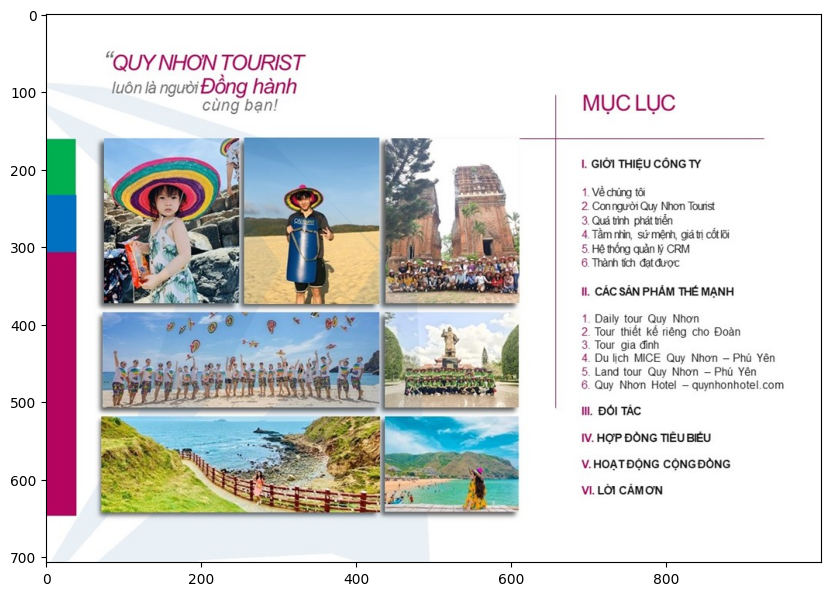

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Mô tả hình ảnh một cách chi tiết trả về dạng markdown.
Assistant: # Quy Nhơn Tourist: Mục lục

**I. Giới thiệu công ty:**

1. Về chúng tôi
2. Con người Quy Nhơn Tourist
3. Quá trình phát triển
4. Tầm nhìn, sứ mệnh, giá trị cốt lõi
5. Hệ thống quản lý CRM
6. Thành tích đạt được

**II. Các sản phẩm thế mạnh:**

1. Daily tour Quy Nhơn
2. Tour thiết kế riêng cho Đoàn
3. Tour gia đình
4. Du lịch MICE Quy Nhơn – Phú Yên
5. Land tour Quy Nhơn – Phú Yên
6. Quy Nhơn Hotel – quynhnonhotel.com

**III. Đối tác:**

IV. Hợp đồng tiêu biểu
V. Hoạt động cộng đồng
VI. Lời cảm ơn


In [ ]:
test_image = "/content/ho-so-nang-luc-quy-nhon-tourist-quynhontourist-1.jpg"
plt.figure(figsize=(10,10))
plt.imshow(Image.open(test_image))
plt.show()
pixel_values = load_image(test_image, max_num=6).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens= 512, do_sample=False, num_beams = 3, repetition_penalty=3.5)

question = '<image>\nMô tả hình ảnh một cách chi tiết trả về dạng markdown.'

response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

In [ ]:
response

'# Quy Nhơn Tourist: Mục lục\n\n**I. Giới thiệu công ty:**\n\n1. Về chúng tôi\n2. Con người Quy Nhơn Tourist\n3. Quá trình phát triển\n4. Tầm nhìn, sứ mệnh, giá trị cốt lõi\n5. Hệ thống quản lý CRM\n6. Thành tích đạt được\n\n**II. Các sản phẩm thế mạnh:**\n\n1. Daily tour Quy Nhơn\n2. Tour thiết kế riêng cho Đoàn\n3. Tour gia đình\n4. Du lịch MICE Quy Nhơn – Phú Yên\n5. Land tour Quy Nhơn – Phú Yên\n6. Quy Nhơn Hotel – quynhnonhotel.com\n\n**III. Đối tác:**\n\nIV. Hợp đồng tiêu biểu\nV. Hoạt động cộng đồng\nVI. Lời cảm ơn'